# Forecasting Website Traffic
Bu projede bir web sayfası ziyaret sayıları analiz edilerek sonraki bir aylık ziyaret değerleri tahmin edilecektir.
<br>Projede kullanılan veriler
<a href="https://thecleverprogrammer.com/2022/06/28/website-traffic-forecasting-using-python/" target="_blank">
bu sayfada</a> temin edilmiştir.
<br>
<img src="https://www.webtasarimsistemleri.com/sayfalar/content/web-tasarim-trafik-analizi-ziyaretci-verilerini-izleme.jpg" width="500px">

In [1]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA # Auto Regressive Integration Moving Average
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### Verilerin Alınması

In [2]:
df=pd.read_csv("Thecleverprogrammer.csv")

In [3]:
df.head()

Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


### Verilerin Zaman Serisine Uygunluk Analizi

In [6]:
import plotly.express as px

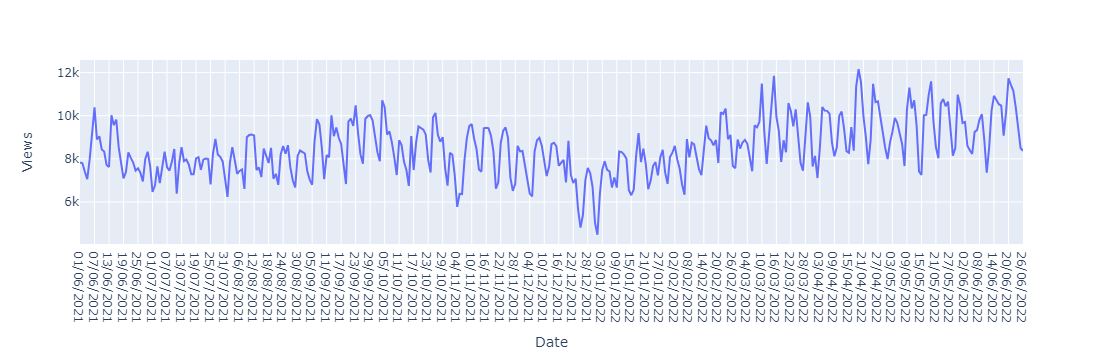

In [7]:
px.line(df, x="Date", y="Views")

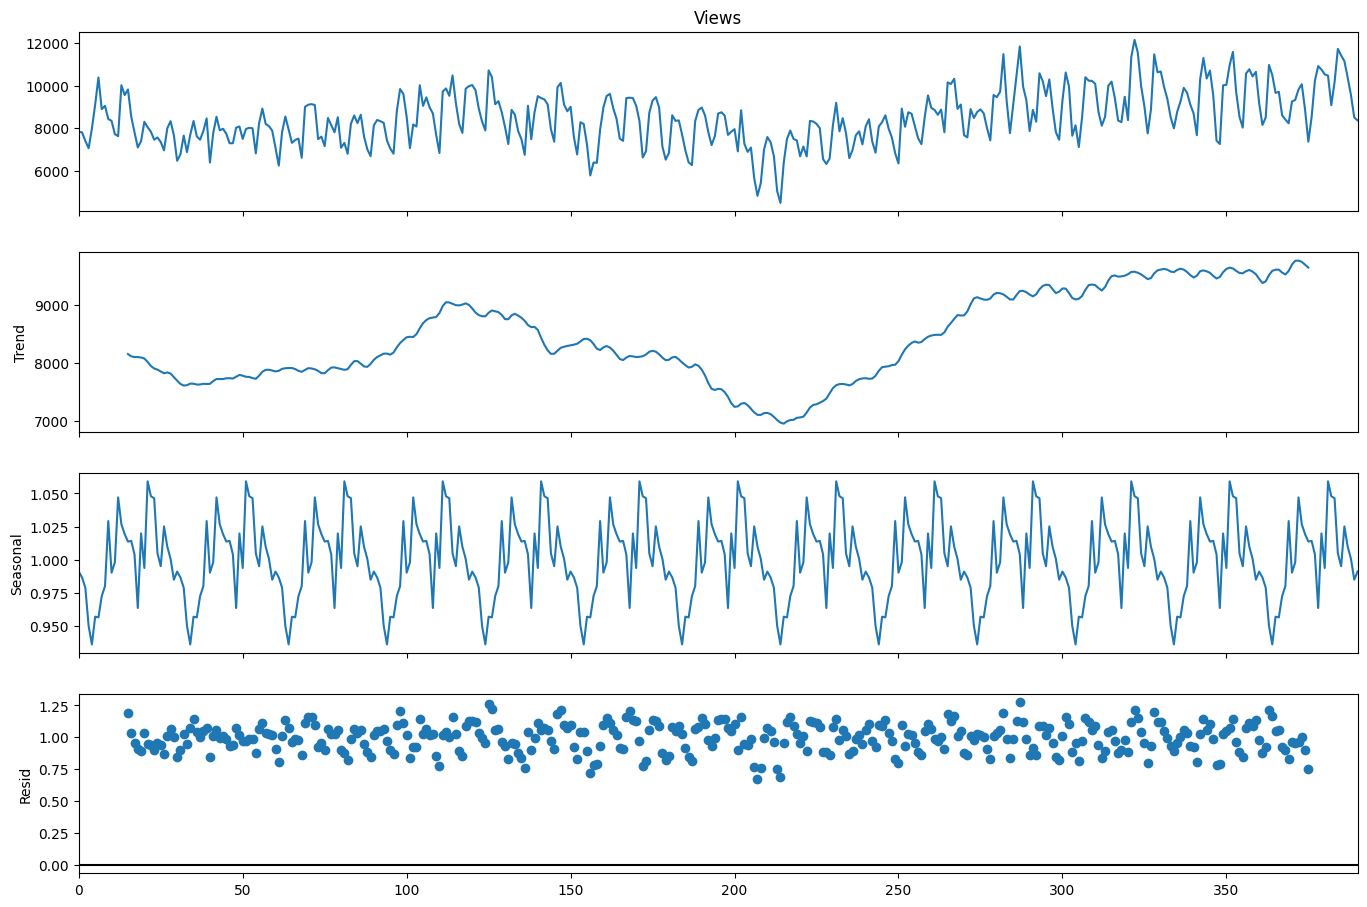

In [8]:
result = seasonal_decompose(df["Views"], model="multiplicative", period=30)
fig = result.plot()
fig.set_size_inches(15,10)

Üzerinde çalıştığımız bu seride elde edilen grafikler aşağıdaki gibidir:
* Trend: Zaman içerisinde yukarı - aşağı- yukarı doğru bir trend eğilimi görülmektedir.
* Seasonal: Aylık sezonlara bakıldığında benzer tekrarın olması bu serinin analiz için uygun olduğu anlamına gelir.
* Resid: Trend ve Seasonal veri çıkarıldığında geriye bir miktar gürültünün kalmaktadır. Ama yine de analize uygun veri seti olduğu düşünülmektedir.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

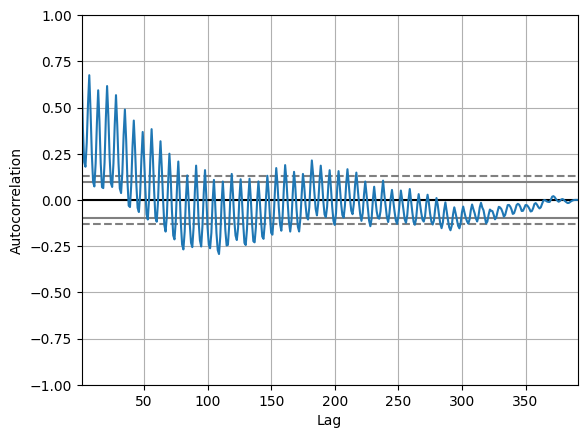

In [9]:
pd.plotting.autocorrelation_plot(df["Views"])

Yukarıdaki grafikte çizginin düz bir çizgi olmaması zaman içindeki değişimlerin anlamlı olduğunu göstermektedir. 
Ancak verilerin çoğunlukla kesikli çizgiler arasında olması başarılı bir tahmin yapmayı zorlaştırabilir.

In [10]:
model = sm.tsa.statespace.SARIMAX(df["Views"])
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Views   No. Observations:                  391
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3262.108
Date:                Mon, 08 Apr 2024   AIC                           6528.217
Time:                        18:02:49   BIC                           6536.154
Sample:                             0   HQIC                          6531.363
                                - 391                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9929      0.007    146.516      0.000       0.980       1.006
sigma2      1.022e+06   7.38e+04     13.843      0.000    8.78e+05    1.17e+06
Ljung-Box (L1) (Q):                   0.06   Jarque-

In [11]:
predictions = results.predict(len(df), len(df)+30)
predictions

391    8308.253974
392    8248.934524
393    8190.038604
394    8131.563190
395    8073.505281
396    8015.861894
397    7958.630071
398    7901.806873
399    7845.389383
400    7789.374703
401    7733.759958
402    7678.542293
403    7623.718871
404    7569.286880
405    7515.243523
406    7461.586025
407    7408.311633
408    7355.417611
409    7302.901242
410    7250.759831
411    7198.990700
412    7147.591192
413    7096.558666
414    7045.890504
415    6995.584104
416    6945.636882
417    6896.046275
418    6846.809736
419    6797.924736
420    6749.388767
421    6701.199336
Name: predicted_mean, dtype: float64

<Axes: >

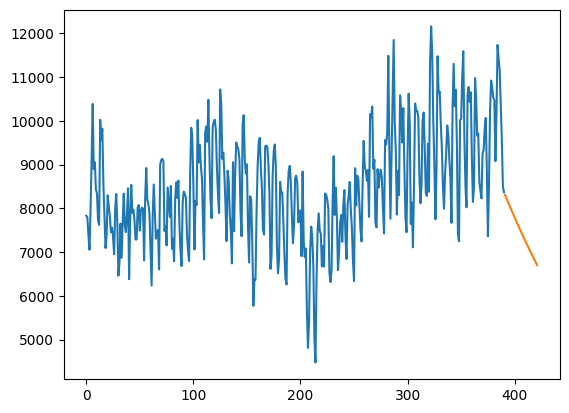

In [12]:
df["Views"].plot()
predictions.plot()

Yukarıdaki result.summary sonucuna ve grafikteki değerlere bakılınca, hata terimlerinin otokorelasyon olmadığını ve normal dağılıma uymadığını göstermektedir. Bu yüzden ARIMA parametrelerini değiştirip yeniden eğitelim.

In [15]:
import statsmodels.api as sm
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(df['Views'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.318
Date:                            Mon, 08 Apr 2024   AIC                           6228.637
Time:                                    18:13:20   BIC                           6287.660
Sample:                                         0   HQIC                          6252.062
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7440      0.132      5.633      0.000       0.485       1.003
ar.L2         -0.7899      0.135   

In [16]:
predictions = model.predict(len(df), len(df)+30)
print(predictions)

391     9889.732925
392    10864.310155
393    10707.291273
394     9783.594282
395     8793.520568
396     8276.114553
397     8948.913886
398     9755.529373
399    10364.567654
400    10546.987750
401     9799.847091
402     9296.084359
403     9011.218252
404     9089.286974
405    10520.368242
406    11018.342850
407    10852.109421
408    10002.727886
409     9382.380460
410     8616.929599
411     9169.891134
412    10398.579901
413    10712.670358
414    10819.775734
415    10219.257078
416     9394.052114
417     9016.231598
418     9218.400802
419    10059.082565
420    10389.990231
421    10748.318362
Name: predicted_mean, dtype: float64


<Axes: >

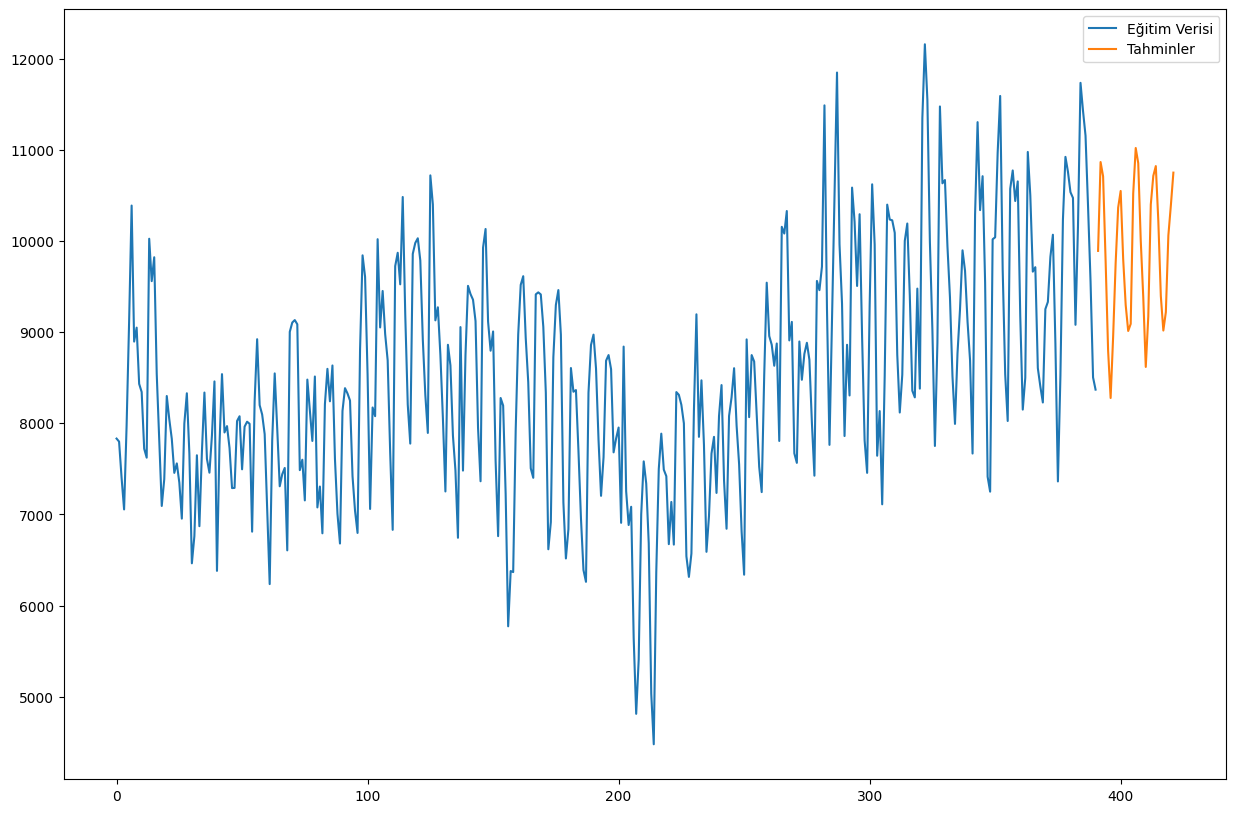

In [17]:
df["Views"].plot(legend=True, label="Eğitim Verisi", figsize=(15, 10))
predictions.plot(legend=True, label="Tahminler")

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [22]:
forecast_data = df.rename(columns={"Date":"ds", "Views":"y"})

18:15:30 - cmdstanpy - INFO - Chain [1] start processing
18:15:30 - cmdstanpy - INFO - Chain [1] done processing


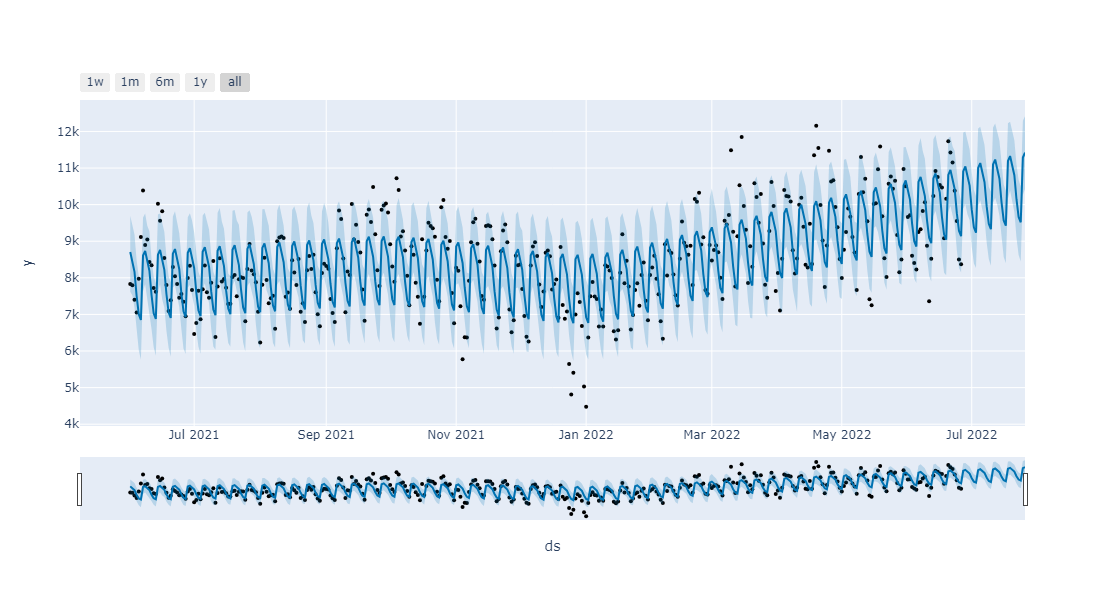

In [23]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=30)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

### Sonuç:
Bu projede bir web sayfası ziyaret sayıları analiz edilerek sonraki bir aylık ziyaret değerleri tahmin edilmiştir. Üzerinde çalışılan zaman serisi değerleri baz alınarak eğitilen modelin ürettiği 30 günlük tahmin değerler, gerçek değerlere yakın olmakla beraber yukarı doğru benzer bir eğilim göstermiştir. 